<a href="https://www.kaggle.com/code/v23joshi/notbook?scriptVersionId=152599256" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [4]:
train = pd.read_csv("/kaggle/input/playground-series-s3e24/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv")

In [5]:
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [6]:
train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

There are no null values, 

In [8]:
train.nunique()

id                     159256
age                        18
height(cm)                 14
weight(kg)                 28
waist(cm)                 531
eyesight(left)             20
eyesight(right)            17
hearing(left)               2
hearing(right)              2
systolic                  112
relaxation                 75
fasting blood sugar       229
Cholesterol               227
triglyceride              392
HDL                       108
LDL                       222
hemoglobin                134
Urine protein               6
serum creatinine           28
AST                       140
ALT                       188
Gtp                       362
dental caries               2
smoking                     2
dtype: int64

Continuous Variables: 

age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), systolic, relaxation, fasting blood sugar, Cholesterol, triglyceride, HDL, LDL, hemoglobin, serum creatinine, AST, ALT, Gtp

Categorical Variables:

hearing(left), hearing(right), Urine protein, dental caries, smoking

Target variable: smoking 

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


In [10]:
train["smoking"].value_counts(normalize=True).mul(100)

smoking
0    56.2635
1    43.7365
Name: proportion, dtype: float64

- 56% of people do not smoke in the train dataset
- Average age of people is 44 years old

In [11]:
train["hearing(left)"].value_counts()

hearing(left)
1    155438
2      3818
Name: count, dtype: int64

In [12]:
train["hearing(right)"].value_counts()

hearing(right)
1    155526
2      3730
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

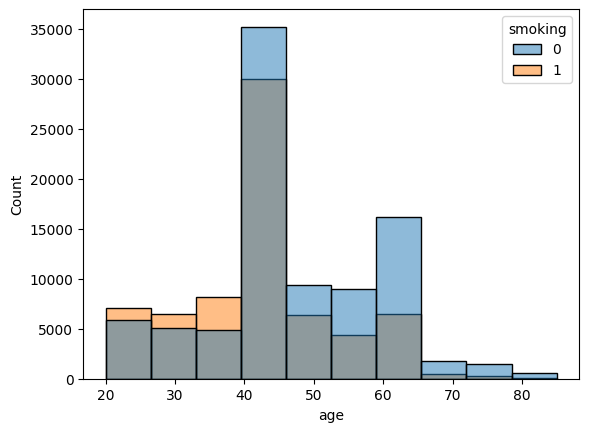

In [13]:
sns.histplot(data=train,x="age",hue="smoking",bins=10)

- Younger people tend to smoke more
- People between 40-45 have highest smokers
- As people get older they tend to stop smoking
- Age must have a correlation with smoking

<Axes: xlabel='height(cm)', ylabel='Count'>

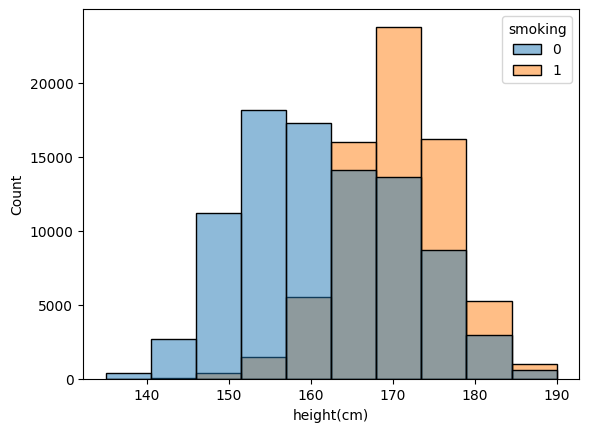

In [14]:
sns.histplot(data=train,x="height(cm)",hue="smoking",bins=10)

- Taller people smoke more compared to shorter people
- Height also has a relation with smoking

<Axes: xlabel='weight(kg)', ylabel='Count'>

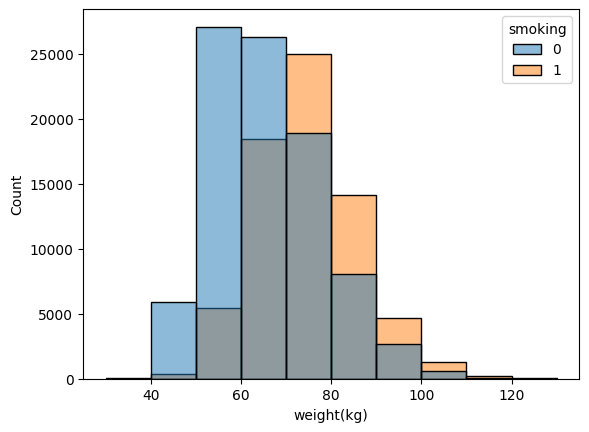

In [15]:
sns.histplot(data=train,x="weight(kg)",hue="smoking",bins=10)

- Higher the weight more the people that smoke
- Keep weight for the model

<Axes: xlabel='waist(cm)', ylabel='Count'>

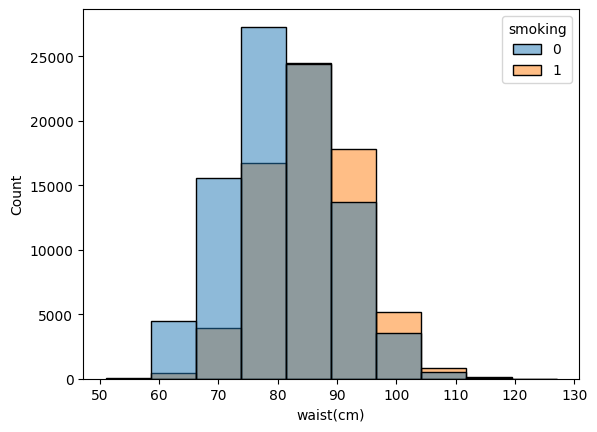

In [16]:
sns.histplot(data=train,x="waist(cm)",hue="smoking",bins=10)

- Similar trend as above, higher the waist size higher the probability that the person smoke

<Axes: xlabel='eyesight(left)', ylabel='Count'>

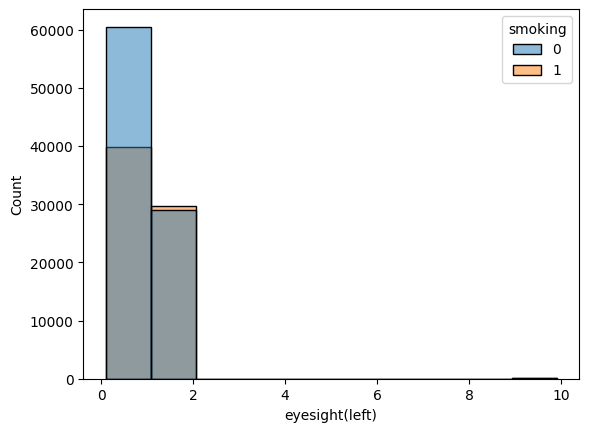

In [17]:
sns.histplot(data=train,x="eyesight(left)",hue="smoking",bins=10)

<Axes: xlabel='eyesight(right)', ylabel='Count'>

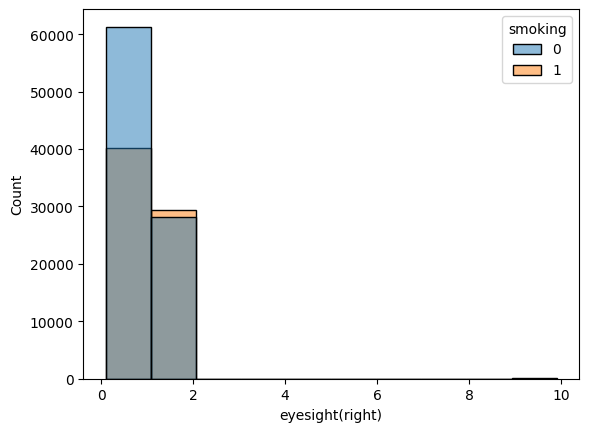

In [18]:
sns.histplot(data=train,x="eyesight(right)",hue="smoking",bins=10)

<Axes: ylabel='Count'>

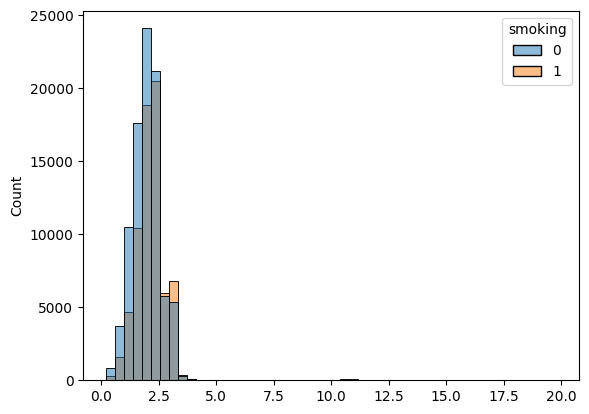

In [19]:
sns.histplot(data=train,x=train["eyesight(left)"]+train["eyesight(right)"],hue="smoking",bins=50)

- There is not much of an impact of eyesight for the smoking but lower the sum of eyesight higher the number of non-smokers 

<Axes: xlabel='hearing(left)', ylabel='Count'>

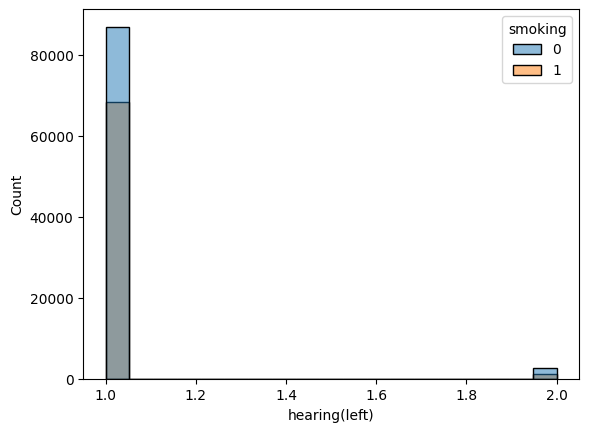

In [20]:
sns.histplot(data=train,x="hearing(left)",hue="smoking")

<Axes: xlabel='hearing(right)', ylabel='Count'>

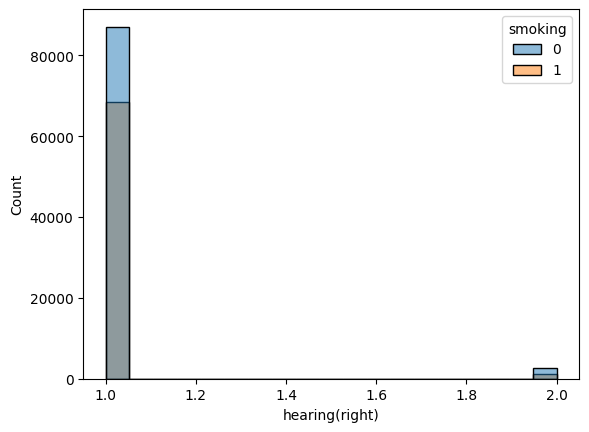

In [21]:
sns.histplot(data=train,x="hearing(right)",hue="smoking")

<Axes: ylabel='Count'>

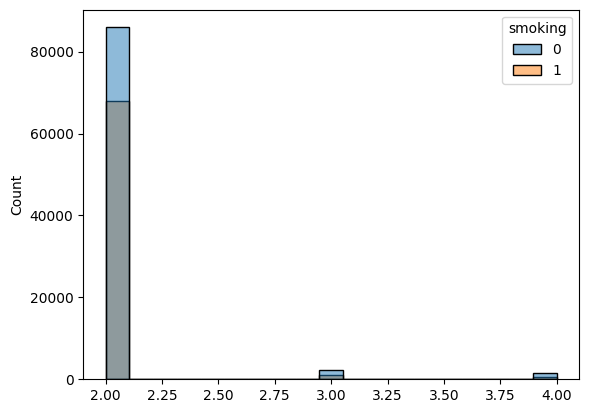

In [22]:
sns.histplot(data=train,x=train["hearing(left)"]+train["hearing(right)"],hue="smoking")

- Not much of an impact of sum of hearning on smoking  

<Axes: xlabel='systolic', ylabel='Count'>

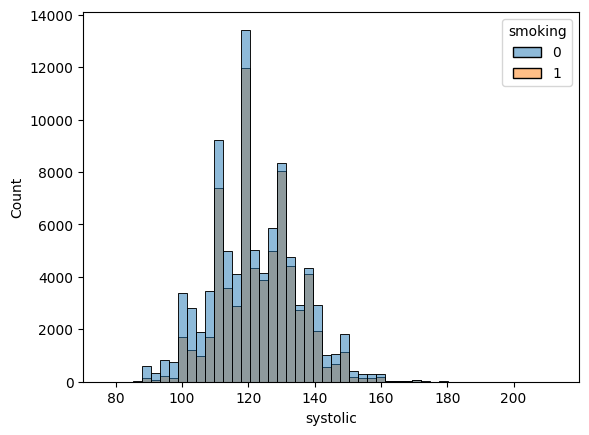

In [23]:
sns.histplot(data=train,x="systolic",bins=50,hue="smoking")

<Axes: xlabel='relaxation', ylabel='Count'>

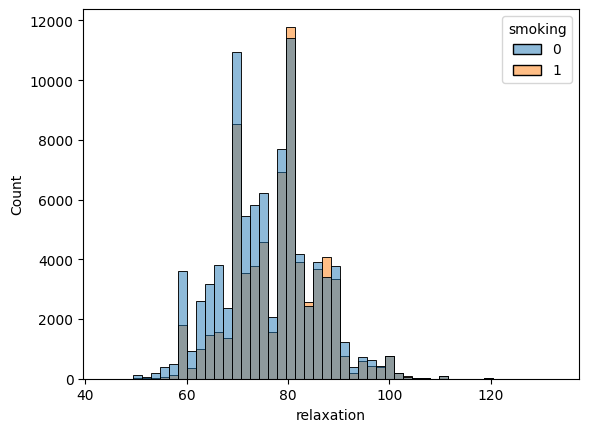

In [24]:
sns.histplot(data=train,x="relaxation",bins=50,hue="smoking")

- Minimal impact

<Axes: xlabel='fasting blood sugar', ylabel='Count'>

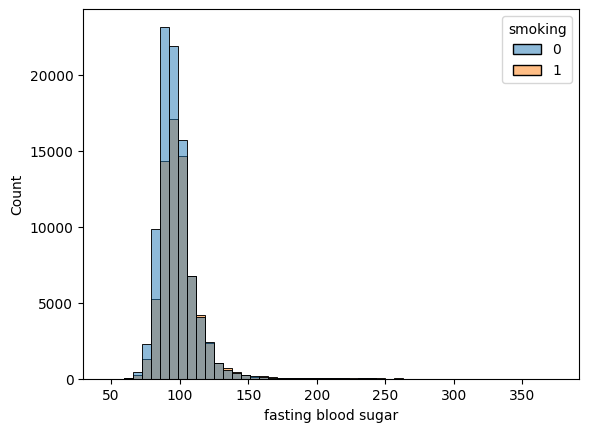

In [25]:
sns.histplot(data=train,x="fasting blood sugar",bins=50,hue="smoking")

- Higher the fasting blood sugar, there is a slightly more chances of smoking

<Axes: xlabel='Cholesterol', ylabel='Count'>

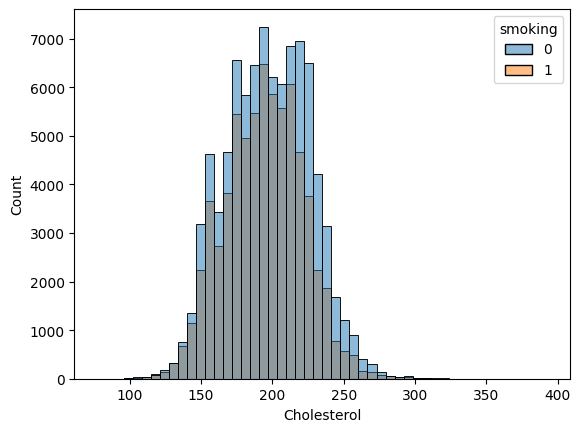

In [26]:
sns.histplot(data=train,x="Cholesterol",bins=50,hue="smoking")

- Cholesterol does not have a big impact of smoking

<Axes: xlabel='triglyceride', ylabel='Count'>

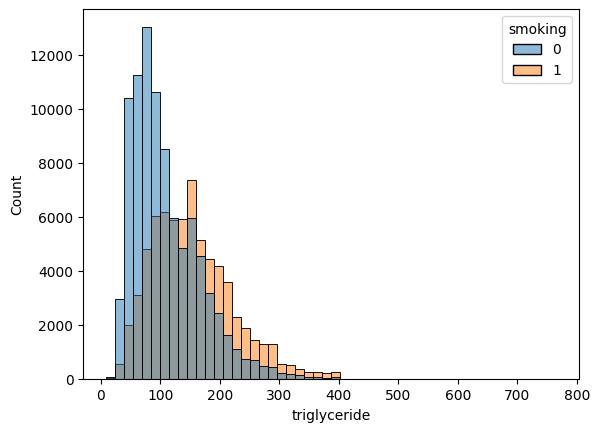

In [27]:
sns.histplot(data=train,x="triglyceride",bins=50,hue="smoking")

- Higher the triglyceride, higher the chance of smoking

<Axes: xlabel='HDL', ylabel='Count'>

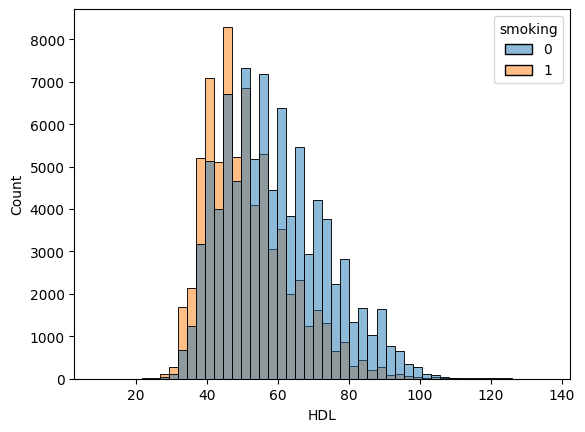

In [28]:
sns.histplot(data=train,x="HDL",bins=50,hue="smoking")

- Lower the HDL, higher the chance of smoking

<Axes: xlabel='LDL', ylabel='Count'>

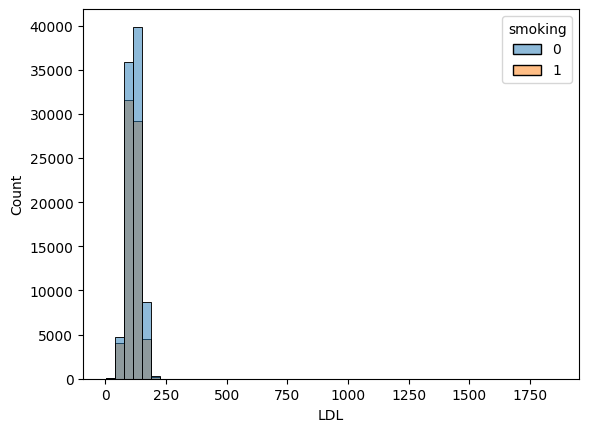

In [29]:
sns.histplot(data=train,x="LDL",bins=50,hue="smoking")

<Axes: >

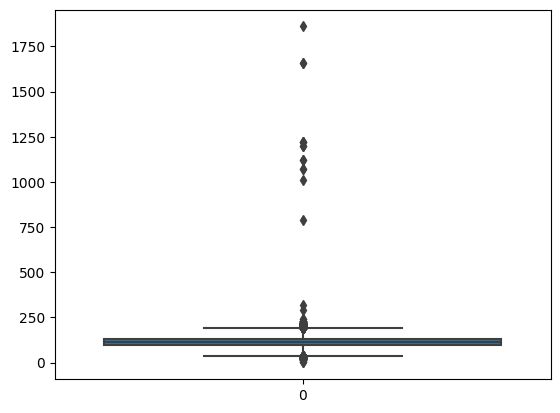

In [30]:
sns.boxplot(train["LDL"])

In [31]:
train[train["LDL"]>=500][["LDL","smoking"]]

,LDL,smoking
12273,1660,0
15691,1220,1
15898,790,0
21041,1070,0
32148,1220,1
35901,1120,1
55119,1070,0
94519,1200,0
100443,1660,0
109197,1860,0


- For the very high LDL, there are more chances of non-smokers

<Axes: xlabel='hemoglobin', ylabel='Count'>

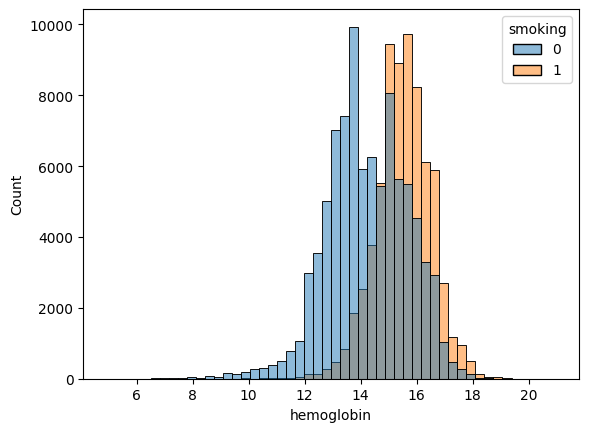

In [32]:
sns.histplot(data=train,x="hemoglobin",bins=50,hue="smoking")

- Higher the hemoglobin, higher the chance of smoking

<Axes: xlabel='Urine protein', ylabel='Count'>

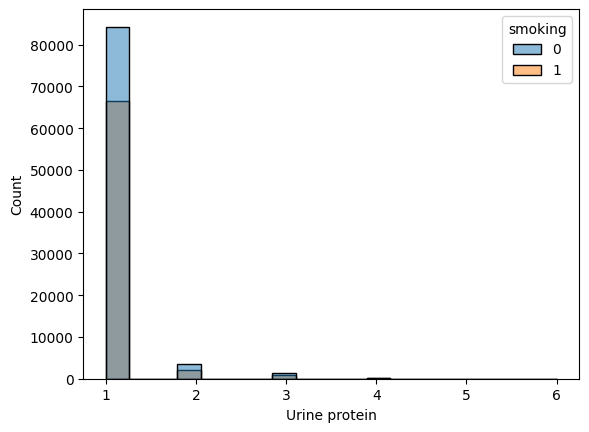

In [33]:
sns.histplot(data=train,x="Urine protein",hue="smoking")

In [34]:
train.groupby(["smoking", "Urine protein"]).size()

smoking  Urine protein
0        1                84311
         2                 3549
         3                 1402
         4                  287
         5                   48
         6                    6
1        1                66551
         2                 2060
         3                  826
         4                  190
         5                   26
dtype: int64

- Urine protien does not impact smoking

<Axes: xlabel='serum creatinine', ylabel='Count'>

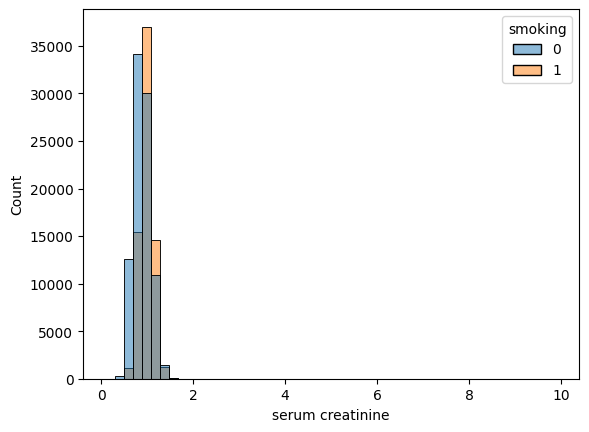

In [35]:
sns.histplot(data=train,x="serum creatinine",bins=50,hue="smoking")

- higher the serum creatinine higher the probability of smoking

<Axes: xlabel='AST', ylabel='Count'>

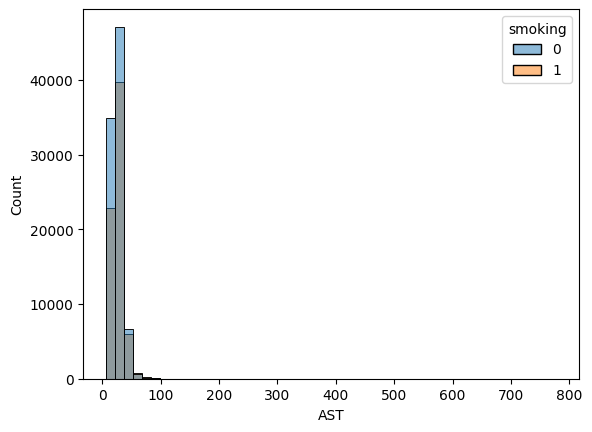

In [36]:
sns.histplot(data=train,x="AST",bins=50,hue="smoking")

<Axes: xlabel='AST'>

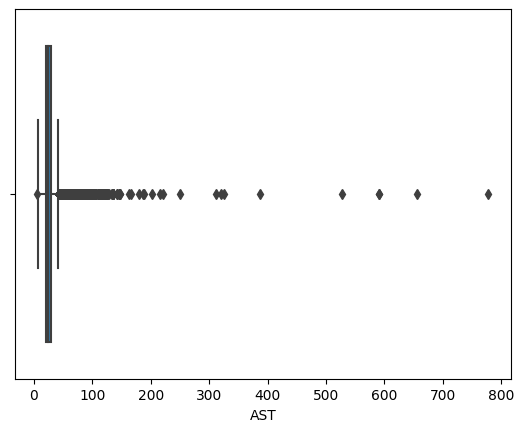

In [37]:
sns.boxplot(data=train,x="AST")

In [38]:
train[train["AST"]>=300][["AST","smoking"]]

,AST,smoking
16934,320,1
54648,326,0
61041,527,1
64470,311,1
70634,591,0
103445,591,1
116757,778,0
119842,387,0
122670,656,1


- AST does not really impact the smoking

<Axes: xlabel='ALT', ylabel='Count'>

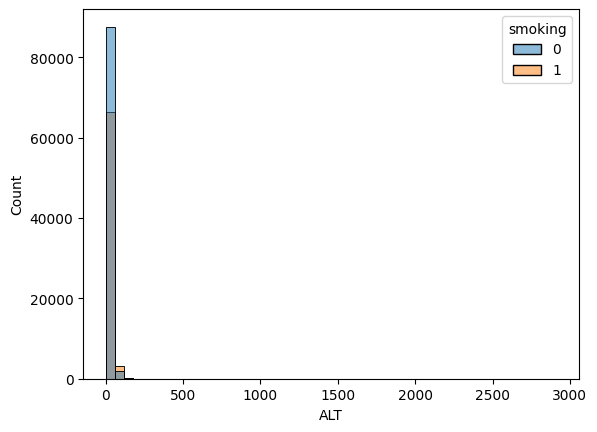

In [39]:
sns.histplot(data=train,x="ALT",bins=50,hue="smoking")

In [40]:
train["ALT"].describe()

count    159256.000000
mean         26.550296
std          17.753070
min           1.000000
25%          16.000000
50%          22.000000
75%          32.000000
max        2914.000000
Name: ALT, dtype: float64

<Axes: xlabel='ALT'>

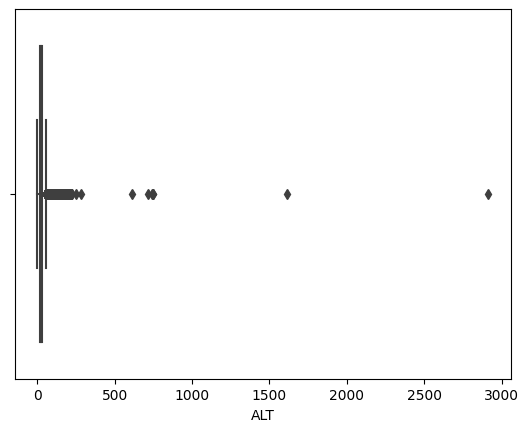

In [41]:
sns.boxplot(data=train,x="ALT")

In [42]:
train[train["ALT"]>=500][["ALT","smoking"]]

,ALT,smoking
13787,2914,1
56061,610,1
61041,713,1
70634,745,0
103445,745,1
116757,740,0
145531,1612,1


- Higher the ALT, higher the chance of smoking

<Axes: xlabel='Gtp', ylabel='Count'>

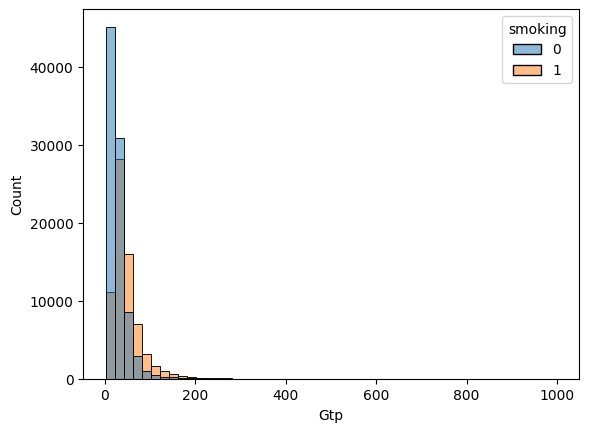

In [43]:
sns.histplot(data=train,x="Gtp",bins=50,hue="smoking")

- Higher the Gtp, higher the probability of smoking

<Axes: xlabel='dental caries', ylabel='Count'>

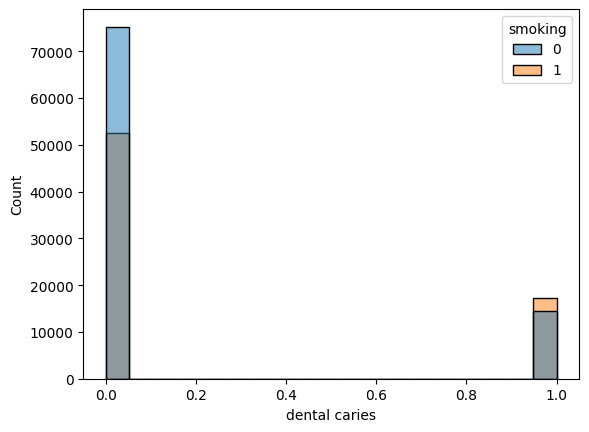

In [44]:
sns.histplot(data=train,x="dental caries",hue="smoking")

- People with dental caries have higher chance of smoking

<Figure size 2000x1500 with 0 Axes>

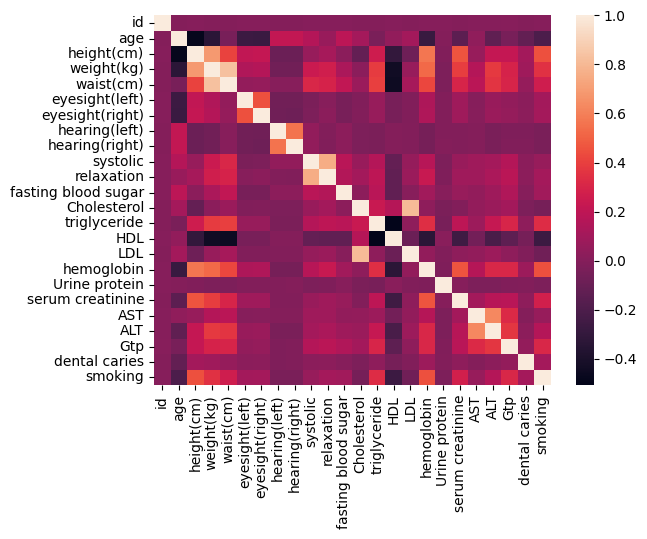

<Figure size 2000x1500 with 0 Axes>

In [45]:
sns.heatmap(train.corr())
plt.figure(figsize=(20, 15))

- age has a high negative correlation with height, weight, eyesight(left), eyesight(right), hemoglobin

In [46]:
train.corr()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,1.000000,-0.003724,0.000710,-0.001656,-0.003491,0.002325,0.001222,-0.003876,-0.003448,0.000107,...,0.003049,-0.003059,0.000834,-0.000900,-0.001278,0.000685,-0.000270,0.006935,-0.001382,-0.000632
age,-0.003724,1.000000,-0.489608,-0.336859,-0.045369,-0.269495,-0.277638,0.212889,0.212972,0.160437,...,0.041411,0.103529,-0.280851,-0.004526,-0.143808,0.036595,-0.131419,-0.046879,-0.120556,-0.206033
height(cm),0.000710,-0.489608,1.000000,0.686645,0.409500,0.209997,0.216729,-0.090110,-0.091760,0.062297,...,-0.303450,-0.080001,0.568739,-0.015097,0.459654,0.059126,0.222305,0.218809,0.100585,0.447111
weight(kg),-0.001656,-0.336859,0.686645,1.000000,0.830208,0.151794,0.161344,-0.069761,-0.070679,0.241495,...,-0.438224,0.059438,0.527259,-0.028537,0.391769,0.160221,0.376899,0.290996,0.091375,0.351748
waist(cm),-0.003491,-0.045369,0.409500,0.830208,1.000000,0.046964,0.055094,0.004759,0.006637,0.306150,...,-0.449219,0.114552,0.418245,-0.029491,0.294176,0.185690,0.359736,0.294166,0.053575,0.262715
eyesight(left),0.002325,-0.269495,0.209997,0.151794,0.046964,1.000000,0.448945,-0.067788,-0.070379,-0.030718,...,-0.043069,-0.018312,0.134314,-0.011633,0.089165,-0.000032,0.063819,0.041759,0.020019,0.100420
eyesight(right),0.001222,-0.277638,0.216729,0.161344,0.055094,0.448945,1.000000,-0.072888,-0.078285,-0.026931,...,-0.047384,-0.016913,0.140602,-0.011213,0.087232,0.007967,0.073843,0.052901,0.024314,0.109781
hearing(left),-0.003876,0.212889,-0.090110,-0.069761,0.004759,-0.067788,-0.072888,1.000000,0.553312,0.041887,...,-0.004135,-0.011467,-0.051724,-0.007248,-0.009447,-0.003497,-0.036896,-0.021820,-0.019155,-0.038219
hearing(right),-0.003448,0.212972,-0.091760,-0.070679,0.006637,-0.070379,-0.078285,0.553312,1.000000,0.041790,...,-0.003311,-0.012463,-0.049649,-0.004164,-0.009263,-0.001232,-0.036679,-0.017286,-0.016100,-0.036858
systolic,0.000107,0.160437,0.062297,0.241495,0.306150,-0.030718,-0.026931,0.041887,0.041790,1.000000,...,-0.116457,0.052032,0.174904,-0.029040,0.066902,0.092272,0.109954,0.159811,0.018136,0.058642


Will remove id, hearing(left), hearing(right) and AST

- X,y, combine, remove, transformations

In [47]:
combine_df = [train,test]
combine_df

[            id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
 0            0   55         165          60       81.0             0.5   
 1            1   70         165          65       89.0             0.6   
 2            2   20         170          75       81.0             0.4   
 3            3   35         180          95      105.0             1.5   
 4            4   30         165          60       80.5             1.5   
 ...        ...  ...         ...         ...        ...             ...   
 159251  159251   40         155          45       69.0             1.5   
 159252  159252   50         155          75       82.0             1.0   
 159253  159253   40         160          50       66.0             1.5   
 159254  159254   50         165          75       92.0             1.2   
 159255  159255   40         145          45       76.4             1.0   
 
         eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  \
 0                 

In [48]:
train = train.drop(["id","hearing(left)","hearing(right)","AST"],axis=1)
test = test.drop(["id","hearing(left)","hearing(right)","AST"],axis=1)
combine_df = [train,test]

In [49]:
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1,1.0,25,27,0,1
1,70,165,65,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1,1.1,23,37,1,0
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,1,0.8,31,53,0,1
3,35,180,95,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1,1.0,27,30,1,0
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,1,0.8,13,17,0,1


In [50]:
test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,130,89,107,200,186,49,115,14.2,1,0.9,25,32,0
1,80,160,60,93.0,1.0,1.0,144,72,93,172,158,35,104,13.0,1,1.1,12,24,0
2,60,170,70,86.5,0.6,0.7,117,75,92,161,173,39,88,15.4,1,1.4,60,36,0
3,40,160,50,67.0,0.3,0.4,116,62,91,213,47,75,128,14.5,1,0.6,18,10,1
4,40,170,75,89.4,1.0,0.9,132,94,79,170,100,39,123,16.5,1,1.0,39,27,1


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  106171 non-null  int64  
 1   height(cm)           106171 non-null  int64  
 2   weight(kg)           106171 non-null  int64  
 3   waist(cm)            106171 non-null  float64
 4   eyesight(left)       106171 non-null  float64
 5   eyesight(right)      106171 non-null  float64
 6   systolic             106171 non-null  int64  
 7   relaxation           106171 non-null  int64  
 8   fasting blood sugar  106171 non-null  int64  
 9   Cholesterol          106171 non-null  int64  
 10  triglyceride         106171 non-null  int64  
 11  HDL                  106171 non-null  int64  
 12  LDL                  106171 non-null  int64  
 13  hemoglobin           106171 non-null  float64
 14  Urine protein        106171 non-null  int64  
 15  serum creatinine 

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   systolic             159256 non-null  int64  
 7   relaxation           159256 non-null  int64  
 8   fasting blood sugar  159256 non-null  int64  
 9   Cholesterol          159256 non-null  int64  
 10  triglyceride         159256 non-null  int64  
 11  HDL                  159256 non-null  int64  
 12  LDL                  159256 non-null  int64  
 13  hemoglobin           159256 non-null  float64
 14  Urine protein        159256 non-null  int64  
 15  serum creatinine 

In [53]:
train['AgeBand'] = pd.cut(train['age'], 5)
train[['AgeBand', 'smoking']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,smoking
0,"(19.935, 33.0]",0.551895
1,"(33.0, 46.0]",0.487106
2,"(46.0, 59.0]",0.368621
3,"(59.0, 72.0]",0.278552
4,"(72.0, 85.0]",0.140049


In [54]:
for dataset in combine_df:
    dataset.loc[(dataset["age"]>19) & (dataset["age"]<=33),"age"] = 0
    dataset.loc[(dataset["age"]>33) & (dataset["age"]<=46),"age"] = 1
    dataset.loc[(dataset["age"]>46) & (dataset["age"]<=59),"age"] = 2
    dataset.loc[(dataset["age"]>59) & (dataset["age"]<=72),"age"] = 3
    dataset.loc[dataset["age"]>72,"age"] = 4
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,smoking,AgeBand
0,2,165,60,81.0,0.5,0.6,135,87,94,172,...,40,75,16.5,1,1.0,25,27,0,1,"(46.0, 59.0]"
1,3,165,65,89.0,0.6,0.7,146,83,147,194,...,57,126,16.2,1,1.1,23,37,1,0,"(59.0, 72.0]"
2,0,170,75,81.0,0.4,0.5,118,75,79,178,...,45,93,17.4,1,0.8,31,53,0,1,"(19.935, 33.0]"
3,1,180,95,105.0,1.5,1.2,131,88,91,180,...,38,102,15.9,1,1.0,27,30,1,0,"(33.0, 46.0]"
4,0,165,60,80.5,1.5,1.0,121,76,91,155,...,44,93,15.4,1,0.8,13,17,0,1,"(19.935, 33.0]"


In [55]:
train = train.drop("AgeBand",axis=1)
combine_df=[train,test]

Create a BMI variable

In [56]:
for dataset in combine_df:
    dataset["BMI"] = dataset["weight(kg)"] / (dataset["height(cm)"] * 0.01)
    

In [57]:
train = train.drop(["weight(kg)","height(cm)"],axis=1)
test = test.drop(["weight(kg)","height(cm)"],axis=1)
train.head()

,age,waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,smoking,BMI
0,2,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1,1.0,25,27,0,1,36.363636
1,3,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1,1.1,23,37,1,0,39.393939
2,0,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,1,0.8,31,53,0,1,44.117647
3,1,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1,1.0,27,30,1,0,52.777778
4,0,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,1,0.8,13,17,0,1,36.363636


In [58]:
test.head()

,age,waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,BMI
0,1,84.0,1.2,1.2,130,89,107,200,186,49,115,14.2,1,0.9,25,32,0,42.424242
1,4,93.0,1.0,1.0,144,72,93,172,158,35,104,13.0,1,1.1,12,24,0,37.500000
2,3,86.5,0.6,0.7,117,75,92,161,173,39,88,15.4,1,1.4,60,36,0,41.176471
3,1,67.0,0.3,0.4,116,62,91,213,47,75,128,14.5,1,0.6,18,10,1,31.250000
4,1,89.4,1.0,0.9,132,94,79,170,100,39,123,16.5,1,1.0,39,27,1,44.117647


In [59]:
for dataset in combine_df:
    dataset["eyesight"] = dataset["eyesight(left)"] + dataset["eyesight(right)"]   

In [60]:
train = train.drop(["eyesight(left)","eyesight(right)"],axis=1)
test = test.drop(["eyesight(left)","eyesight(right)"],axis=1)
train.head()

,age,waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,smoking,BMI
0,2,81.0,135,87,94,172,300,40,75,16.5,1,1.0,25,27,0,1,36.363636
1,3,89.0,146,83,147,194,55,57,126,16.2,1,1.1,23,37,1,0,39.393939
2,0,81.0,118,75,79,178,197,45,93,17.4,1,0.8,31,53,0,1,44.117647
3,1,105.0,131,88,91,180,203,38,102,15.9,1,1.0,27,30,1,0,52.777778
4,0,80.5,121,76,91,155,87,44,93,15.4,1,0.8,13,17,0,1,36.363636
